### Import required Libraries 

In [2]:
#  Data manipulation & visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  Model building & evaluation
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

#  NLP libraries: spaCy 
import spacy
nlp = spacy.load("en_core_web_sm")

sns.set()

In [3]:
!python -m spacy download en_core_web_sm


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
      --------------------------------------- 0.3/12.8 MB ? eta -:--:--
     - ------------------------------------- 0.5/12.8 MB 139.8 kB/s eta 0:01:28
     - ------------------------------------- 0.5/12.8 MB 139.8 kB/s eta 0:01:28
     - ------------------------------------- 0.5/12.8 MB 139.8 kB/s eta 0:01:28
     - ---------------------------------

## Load the Data

In [5]:
# Load the balanced reviews dataset
df = pd.read_csv('balanced_reviews_dataset3.csv')
#display the balanced dataset
df

,reviewerID,asin,reviewerName,helpful,reviewText,Rating,summary,reviewTime,review_length
0,A7MRWQD30ZG1,B002OKLUGW,AmaZonWindowShopper,"[0, 0]",the item was exactly as described but it makes...,4,NIce Product!,"07 1, 2013",24
1,A247P51OUO683W,B005LGUCRE,"M. Prentice ""Splaktar""","[1, 1]",i picked this up at the tmo store the build qu...,3,Does not work with cases and arm is a bit short,"06 22, 2012",204
2,A7M7JDSCN0HMM,B008DJIGR4,Paul Q,"[0, 0]",the case fits the phone well except around the...,1,"Poor fit around the volume button, skip this one","08 21, 2013",97
3,A2EK2UMX5LNCAI,B00687N0GK,Dave H,"[0, 0]",very compact but found it kinda difficult to p...,3,Wish it was easier to place/Remove the phone,"10 8, 2012",47
4,A4S2GMZIQKEHY,B004VN09LM,Eldude,"[0, 0]",off the top i will say that depending on who y...,3,Its...okay,"11 4, 2012",128
...,...,...,...,...,...,...,...,...,...
9995,A36XRXX2WQWAWC,B007Z0VXHM,Kanitra,"[0, 0]",for the price this bumper is pretty good its d...,3,decent,"12 14, 2012",39
9996,A2L0KSRC92EGK3,B00FUXV6QO,aaron,"[0, 0]",if you are looking for a cheap case to protect...,3,nothing smart about it!!!!!,"05 3, 2014",21
9997,A3PEM0PUG9YHD5,B00004WINT,usnrma,"[0, 0]",these are the exact ones that i was looking fo...,3,They are ok,"01 23, 2014",88
9998,A3LQVXPXFRZKGO,B0035R2QS4,vishal,"[0, 0]",a compete waste of money and expectations too ...,1,never worked,"04 23, 2014",26


In [6]:
#shape of the dataset
df.shape

(10000, 9)

In [7]:
#columns of the dataframe
df.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText', 'Rating',
       'summary', 'reviewTime', 'review_length'],
      dtype='object')

In [8]:
#checking if there is any null values present
df.isnull().sum()

reviewerID       0
asin             0
reviewerName     0
helpful          0
reviewText       0
Rating           0
summary          0
reviewTime       0
review_length    0
dtype: int64

In [9]:
#checking for the duplicate values
df.duplicated().sum()

0

In [10]:
#display 3 full sample reviews per rating
for rating in sorted(df['Rating'].unique()):
    print(f"\n⭐ Rating {rating}")
    reviews = df[df['Rating'] == rating].tail(3)
    for _, row in reviews.iterrows():
        print(f"\n- {row['reviewText']}\n")


⭐ Rating 1

- 3000mah is roughly twice the capacity of an iphone 4 which i used for music and nike app while trail running the phone alone 1400mah could last 34 hours with audio gps and miscellaneous nearconstant activity it stands to reason that the anker 3000mah could at least double the usable span if not triple itafter a particular run i ran the phone down to 45 and plugged it into the anker while i entertained myself on the phone and waited for a long series of photographic exposures after an hour of charging the phone the anker had been drained and the phone was back on its own power without having been recharged further than another 15 by the ankerive got another battery cell thats at least four times heavier higher capacity also that doesnt selfdischarge nearly as badly as this but its half again as heavy as a loaded ultralight trail running backpack


- this is not the same useful juice pack i have come to expect from mophie saw it at the apple store today and bought it with 

In [11]:
df['word_count'] = df['reviewText'].apply(lambda x: len(str(x).split()))

In [12]:
#display the statistics of the word count
min_word_counts = df.groupby('Rating')['word_count'].describe()
print(min_word_counts)


         count     mean        std  min   25%   50%    75%    max
Rating                                                           
1       2000.0  66.5735  57.399486  4.0  27.0  46.0   82.0  348.0
2       2000.0  79.1530  68.230281  4.0  31.0  53.5  102.0  348.0
3       2000.0  79.1330  71.235585  4.0  29.0  50.0  104.0  350.0
4       2000.0  82.5520  73.502752  4.0  30.0  54.0  106.0  349.0
5       2000.0  66.9570  64.794122  4.0  26.0  40.5   77.0  347.0


## Data Visualisation
### Bar graph for Rating distribution

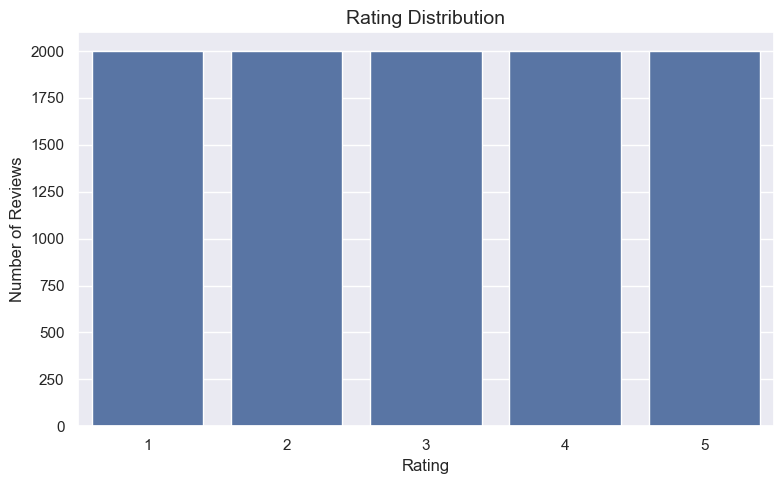

In [14]:
#  Visualize the distribution of review ratings

plt.figure(figsize=(8, 5))  # Set figure size

# Create a count plot for the 'Rating' column
sns.countplot(x='Rating', data=df)

# Add plot titles and labels
plt.title("Rating Distribution", fontsize=14)
plt.xlabel("Rating", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


In the above plot we can see that all the Ratings are equally distributed,that is all have equal amount of data ** (2000) ** rating distribution is balanced, with an equal number of reviews (~2000) for each rating from 1 to 5. This ensures the model is trained without bias toward any specific rating class.


###  Review Length Distribution using Histogram

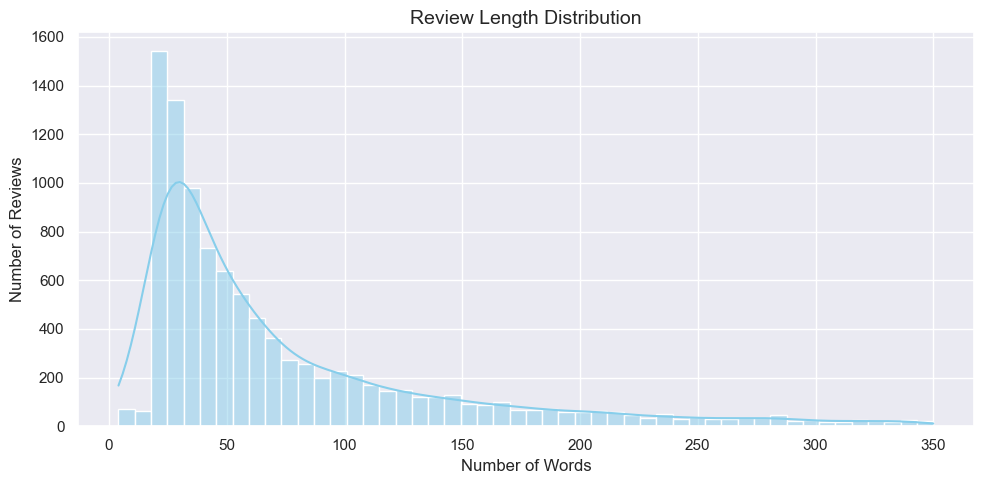

In [17]:
# Visualize the distribution of review lengths (number of words per review)

plt.figure(figsize=(10, 5))  # Set the size of the plot

# Create a histogram of review lengths with a KDE (smoothed line)
sns.histplot(data=df, x='review_length', bins=50, kde=True, color='skyblue')

# Add titles and axis labels
plt.title("Review Length Distribution", fontsize=14)
plt.xlabel("Number of Words", fontsize=12)
plt.ylabel("Number of Reviews", fontsize=12)

# Improve layout and display the plot
plt.tight_layout()
plt.show()



Most reviews contain fewer than 50 words, with the distribution being right-skewed. This indicates that shorter reviews are more common, though some users write lengthy reviews exceeding 300 words.


###  Visualize rating distribution using a pie chart


In [20]:
# Count the number of reviews per rating (sorted by rating value)
rating_counts = df['Rating'].value_counts().sort_index()

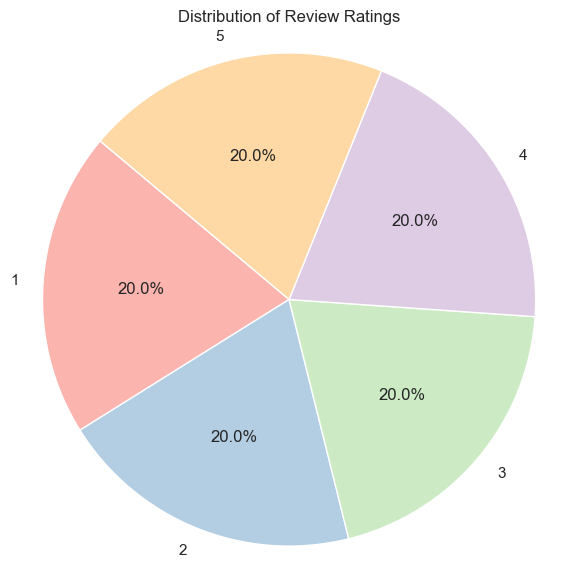

In [21]:
# Labels for pie slices (e.g., '1', '2', ..., '5')
labels = rating_counts.index.astype(str)
#Corresponding values (number of reviews per rating)
sizes = rating_counts.values

# Plot pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title('Distribution of Review Ratings')
plt.axis('equal')  # Equal aspect ratio makes the pie chart circular
plt.show()

The pie chart confirms an equal distribution of all five rating classes, each comprising 20% of the dataset. This reinforces that the data is perfectly balanced, which is ideal for building unbiased classification models.


## Train-Test-Split

In [24]:
#  Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(df['reviewText'],df['Rating'], test_size=0.2, random_state=42,stratify=df['Rating'] )

In [25]:
print("Train Rating Distribution:\n", y_train.value_counts(normalize=True))
print("\nTest Rating Distribution:\n", y_test.value_counts(normalize=True))


Train Rating Distribution:
 Rating
1    0.2
4    0.2
3    0.2
2    0.2
5    0.2
Name: proportion, dtype: float64

Test Rating Distribution:
 Rating
1    0.2
2    0.2
3    0.2
5    0.2
4    0.2
Name: proportion, dtype: float64


### Lemmatization and Stopword Removal

In [27]:
def spacy_preprocess(text):
    """
    Preprocess text using spaCy:
    - Tokenize the text
    - Remove stopwords and space tokens using spaCy
    - Lemmatize using spaCy

    Args:
        text (str): Input text

    Returns:
        str: Cleaned and lemmatized text
    """
    # Process the text using spaCy
    doc = nlp(text)

    # Filter and lemmatize
    tokens = [
        token.lemma_                      # spaCy lemmatization
        for token in doc
        if not token.is_stop and         # spaCy stopword removal
           not token.is_space and
           token.is_alpha                # Keep only alphabetic words (optional)
    ]

    return ' '.join(tokens)


In [28]:
#print the list of stopwords 
print(sorted(nlp.Defaults.stop_words))
# Print total number of unique stopwords in spaCy's English model
print("Number of spaCy stopwords:", len(nlp.Defaults.stop_words))

["'d", "'ll", "'m", "'re", "'s", "'ve", 'a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'both', 'bottom', 'but', 'by', 'ca', 'call', 'can', 'cannot', 'could', 'did', 'do', 'does', 'doing', 'done', 'down', 'due', 'during', 'each', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fifty', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had', 'has', 'have', 'he', 'hence', 'her', 'here', 'he

In [29]:
# Apply stopword removal and lemmatization to the training and test text data

# Apply preprocessing to each review in the training set
X_train = X_train.apply(spacy_preprocess)

# Apply preprocessing to each review in the test set
X_test = X_test.apply(spacy_preprocess)


In [30]:
#shows the stopword removal and lemmatized text 
print(X_train.sample(5).values)

['buy replace year old plantronic work great flexible earpiece finally tweakabilitywith pretty decent review sale price try frugal get pay forbinde issue puppy not stay connected htc incredible anytime get somewhat separated push connectdevice button android reconnect frustrating plantronc awesome stay connect reconnectingvolume not drive toyota tundra honda odyssey pretty quiet loaded vehicle little truck road noise tire kid barely loud s traffic andor kid quietnoisy callee people complain have difficulty understand not good job cancel ambient noisefor noise volume reason end drive left hand cup ear mouth hand free longerbattery charge life poor plug problematic ac adapter pita know fail reconnect dead againno inexpensive mid low end headset pay sure look good review noise cancel power bind compare expensive model s usually reference replace crappy xyz find get good review people get lucky not know well etc'
 'cable work plug direction iphone direction intermittant connection usually 

In [31]:
# Initialize and fit TF-IDF on training only
tfidf = TfidfVectorizer(max_features=5000)  
X_train_tfidf = tfidf.fit_transform(X_train)
# Transform test using the same fitted vectorizer
X_test_tfidf = tfidf.transform(X_test)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define hyperparameter grid
param_grid2 = {
    'C': [0.01, 0.1, 1, 10],              # Inverse of regularization strength
    'penalty': ['l2'],                    # L1 and L2 are regularization methods
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'max_iter': [100, 200, 500]           # Number of iterations to converge
}

# Initialize the base model
log_reg = LogisticRegression(multi_class='auto', random_state=42)

# Grid Search with cross-validation
grid_search2 = GridSearchCV(log_reg, param_grid2, scoring='f1_macro', cv=3, verbose=2, n_jobs=-1)
grid_search2.fit(X_train_tfidf, y_train)

# Best model
best_model2 = grid_search2.best_estimator_

# Evaluate
y_pred2 = best_model2.predict(X_test_tfidf)
print(classification_report(y_test, y_pred2))


Fitting 3 folds for each of 36 candidates, totalling 108 fits


C:\Users\TOSHIBA\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


              precision    recall  f1-score   support

           1       0.51      0.63      0.56       400
           2       0.32      0.26      0.29       400
           3       0.35      0.30      0.32       400
           4       0.42      0.42      0.42       400
           5       0.54      0.59      0.56       400

    accuracy                           0.44      2000
   macro avg       0.43      0.44      0.43      2000
weighted avg       0.43      0.44      0.43      2000



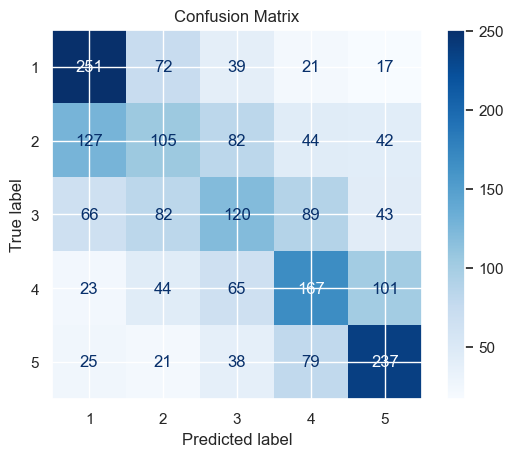

In [33]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred2, labels=sorted(y_test.unique()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(y_test.unique()))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [34]:
import joblib

In [63]:
# Save the trained model
joblib.dump(best_model2, 'Model_A.pkl')  

# Save the fitted vectorizer
joblib.dump(tfidf, 'TfidfVectorizer.pkl')

['TfidfVectorizer.pkl']

In [90]:
# Load imbalanced model and its TF-IDF vectorizer
model_B = joblib.load("Model_B.pkl")
tfidf_B = joblib.load("TfidfVectorizer_b.pkl")

In [92]:
X_test_tfidf_balanced_for_imbalanced_model = tfidf_B.transform(X_test)

In [94]:
y_pred_modelB_on_balanced = model_B.predict(X_test_tfidf_balanced_for_imbalanced_model)

In [96]:
from sklearn.metrics import classification_report, confusion_matrix

print("Evaluation of Imbalanced Model on Balanced Test Set:")
print(classification_report(y_test, y_pred_modelB_on_balanced))


Evaluation of Imbalanced Model on Balanced Test Set:
              precision    recall  f1-score   support

           1       0.70      0.32      0.44       400
           2       0.40      0.26      0.32       400
           3       0.30      0.39      0.34       400
           4       0.33      0.57      0.42       400
           5       0.56      0.47      0.51       400

    accuracy                           0.40      2000
   macro avg       0.46      0.40      0.40      2000
weighted avg       0.46      0.40      0.40      2000



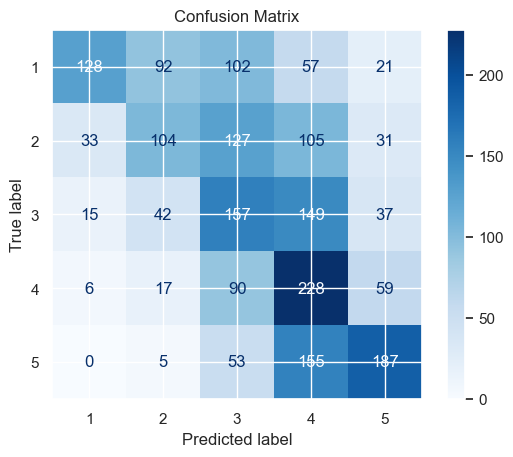

In [98]:
cm = confusion_matrix(y_test, y_pred_modelB_on_balanced, labels=sorted(y_test.unique()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sorted(y_test.unique()))
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()